In [1]:
# Rendus pour le projet "Estimation de densité - Cas des Dauphins de Gascogne"
# TSP - P4 | Océane Wauquier, Alix Aouar, Erwan Le Blévec 

# Remarque : Nous avons séparé les questions rédigées sur un pdf : "P4 - Projet Dauphin" pour que le Notebook 
# se concentre sur le code (pour plus de lisibilité). On vous conseille de les lire en parallèle.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_test.csv', header = 0)
data

,8.284677256851257221e-01
0,1.790691
1,-2.528494
2,1.834131
3,-2.239135
4,1.809938
...,...
4994,-1.617013
4995,-1.576811
4996,0.009935
4997,1.843301


#### Question : 
Dans l'énonce il est dit que les données sont issues de 1269 observations, or il y a 4999 lignes dans 'data'. Qu'est-ce qui est entendu par "observations" ?

In [3]:
data = data.to_numpy()

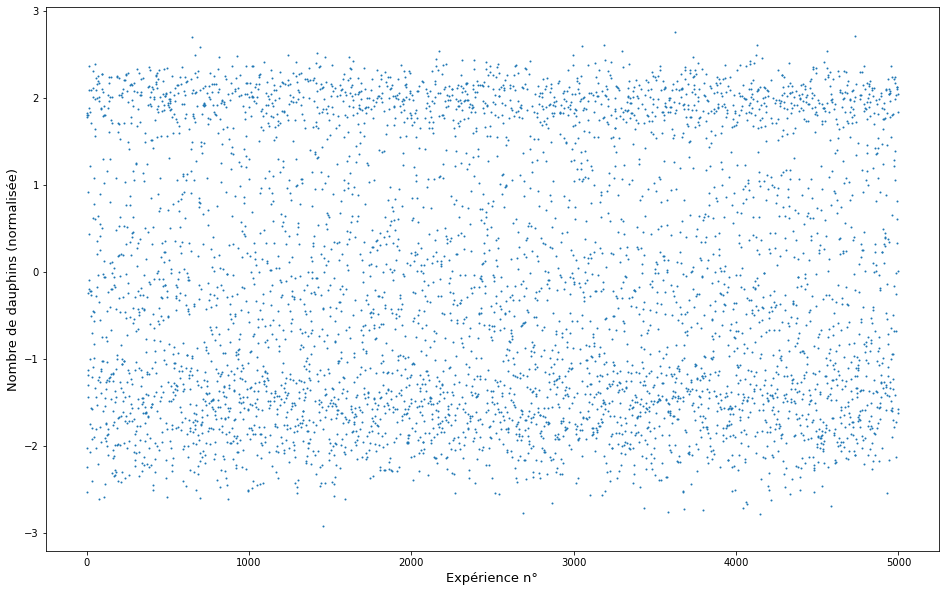

In [4]:
# L'affichage avec un plot sur une figure de "petite" taille n'est pas très lisible,

fig, ax = plt.subplots(figsize=(16, 10))


ax.scatter(range(len(data)), data, s=1, cmap='b') # On passe par ax.scatter() pour les mêmes raisons
ax.set_xlabel('Expérience n°', fontsize=13)
ax.set_ylabel("Nombre de dauphins (normalisée)", fontsize=13)


plt.show() # fig.show() ne marche pas ..

In [5]:
# On tire un histogramme de la base de données pour t0 = np.min(data) et un nombre de "classes" égal à m

def histo(data, m): 
    min_, max_ = np.min(data), np.max(data)
    h = (max_ - min_) / m
    
    intervalles = np.array([min_ + i * h for i in range(0, m+1)])
    #print('Intervalles :', intervalles)
    #print('')
    
    hist_l = []
    for x in data:
        position = (intervalles[:-1] <= x ) * (x < intervalles[1:])  # position = [A_0, A_1, A_2, ..., A_m] (En gros)
        index = np.nonzero(position)[0] # Intervalle auqueul appartient x
        
        if not index.size : # Le maximum de data n'est pas reconnu dans les intervalles, dans ce cas index = [] donc index.size = 0
            hist_l.append(m-1)
        else:
            index = index[0] # Pour avoir un entier et pas un array
            hist_l.append(index) 
            
    return hist_l

histog = histo(data, 5)
print(len(histog), histog[:10])


# hist_l est donc une liste de longueur 4999 avec l'index de l'intervalle associé à chaque élément de data.

4999 [4, 0, 4, 0, 4, 0, 2, 1, 4, 1]


(array([ 720.,    0., 1542.,    0.,    0.,  934.,    0.,  568.,    0.,
        1235.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

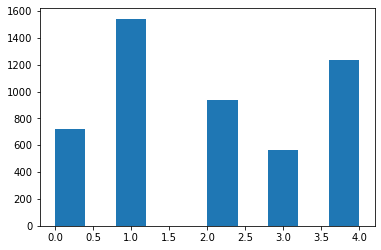

In [6]:
plt.hist(histog)

Il n'y a pas énormémement de remarques à faire à partir de cette figure.
La normalisation semble avoir été réalisée correctement. Quelques données sont particulièrement éloignées mais rien d'aberrant

### Un premier estimateur $\ \ \ \textit{À base d'histogrammes}$

Dans cette section on suppose que $\mathsf{X}$ est borné et on suppose que $\mathsf{X}=[0,1)$ sans perte de généralités. Pour tout $m\geqslant 1$ on considère $(A_1,\ldots, A_m)$ la partition uniforme de $[0,1)$ définie, pour tout $1\leqslant i \leqslant m$, par $A_i = [(i-1/m),i/m)$. Soient $(X_1\ldots,X_n)$ des variables aléatoires i.i.d. de loi de densité $p_{\star}$ par rapport à la mesure de Lebesgue sur $[0,1)$. On considère l'estimateur par histogramme de la densité $p_{\star}$ :

$$
\widehat{p}^h_n:x\mapsto \frac{1}{nh}\sum_{i=1}^n\sum_{j=1}^m 1_{A_j}(X_i)1_{A_j}(x)\,,
$$

où $h=1/m$.

<font color=darkblue> **T1** Evaluer l'erreur quadratique moyenne associée à cet estimateur.</font>

$\textit{Voir Rapport Écrit, question T.1}$

<font color=darkblue> **T2** Evaluer l'erreur quadratique moyenne intégrée associée à cet estimateur.</font>

$\textit{Idem, T.2 }$

<font color=darkblue> **S2** Ecrire une fonction produisant l'estimateur pour une valeur de $m$ donnée. Tracer l'estimateur pour différentes valeurs de $m$.</font>

In [7]:
def hist_estimate(data, m):
    """
    Inputs
    ----------
    data: np.array contenant les X_i.
    m: nombre d'éléments de la partition.
    
    Outputs
    -------
    hist_est: fonction retournant l'estimation de la densité pour chaque x donné en argument.
    """
    
    n = len(data)
    h = 1/m
    
    min_, max_ = np.min(data), np.max(data)
    p = (max_ - min_) / m
    
    intervalles = np.array([min_ + i * p for i in range(0, m+1)])
    histogramme = histo(data, m)

    
    def get_class(x):
        position = (intervalles[:-1] <= x ) * (x < intervalles[1:]) # L'indice non nul correspond à l'intervalle A_i auquel x appartient
        arr_index = np.nonzero(position)[0]
        
        if not arr_index.size :
            if x == max_: # Seul élément de la base de données à ne pas être reconnu dans la liste "intervalles"
                return m - 1
            
            return None # Si x est en dehors de [min(data), max(data)] on n'attribue pas de classe.
        
        else:
            index = arr_index[0] # Pour avoir un int
            return index   

    
    def hist_est(x):
        x_class = get_class(x) # On va chercher l'intervalle (A_i) auquel appartient x 
        res = np.count_nonzero(histogramme == x_class) # On compte le nombre d'éléments dans l'intervalle associé
         
        return res / (n * h)
    
    return hist_est

In [8]:
max_m = 12
M = [i for i in range(1, max_m, 2)]
X = np.linspace(-4, 4, 300)
print('Nombre de classes considérées : ', M)

Nombre de classes considérées :  [1, 3, 5, 7, 9, 11]


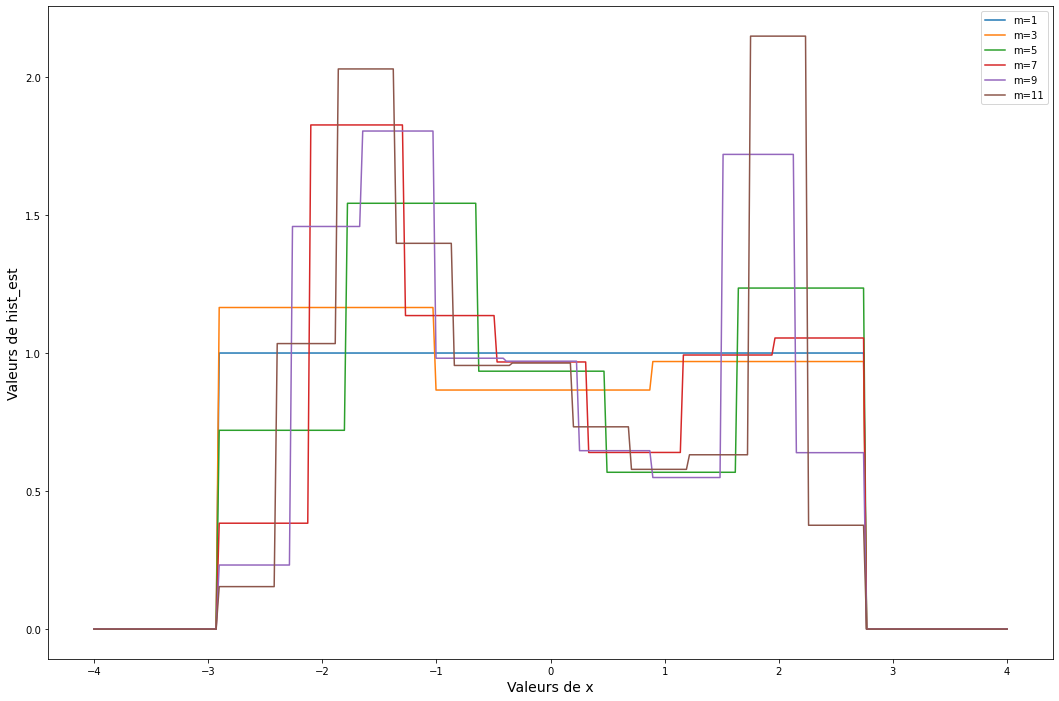

In [9]:
# Affiche les résultats pour différentes valeurs de m 

fig, ax = plt.subplots(figsize=(18, 12))

for m in M:
    #print('Itération pour m = {}'.format(m))
    hist_est = hist_estimate(data, m)
    res = [hist_est(x) for x in X]
    ax.plot(X, res, label='m={}'.format(m))

ax.set_xlabel('Valeurs de x' , fontsize=14)
ax.set_ylabel('Valeurs de hist_est' , fontsize=14)
ax.legend()
plt.show()

#### Remarque : 
Limite de l'estimateur à histogrammes : il dépend de deux paramètres, à savoir le point initial et la longueur des intervalles, qui en fait des estimateurs certes simples mais souvent imprécis.

## Estimateur à base de noyaux

La densité $p_{\star}$ est estimée par l'estimateur à noyau suivant :

$$
\widehat{p}^{h_n}_n:x\mapsto \frac{1}{nh_n}\sum_{i=1}^n K\left(\frac{X_i-x}{h_n}\right)\,.
$$

où $K:\mathbb{R}\to \mathbb{R}$ est une fonction positive telle que $\int_{\mathbb{R}}K(x) dx = 1$ et où $h_n$ est un réel strictement positif.

<font color=darkblue> **T3.1** En supposant que $K$ est telle que $\int_{\mathbb{R}}K^2\left(u\right)du < \infty$, montrer que la variance de l'estimateur est inférieure à un terme d'ordre $(nh_n)^{-1}$.</font>

$\textit{Rapport Écrit q. T3.1}$

<font color=darkblue> **T3.2** En supposant $p_\star$ deux fois dérivable et de dérivée seconde bornée et en supposant que $K$ est telle que $\int_{\mathbb{R}}u^2 \left|K\left(u\right)\right|du < \infty$, montrer que le biais de l'estimateur est inférieur à un terme d'ordre $h_n^2$.</font>

$\textit{Rapport Écrit q. T3.2}$

<font color=darkblue> **T3.3** En déduire une borne de l'erreur quadratique moyenne et un choix optimal de $h_n$ en fonction de $n$.</font>

$\textit{Rapport Écrit q. T3.3}$

<font color=darkblue> **S3** Ecrire une fonction retournant l'estimateur à noyau pour un choix de $h_n$ et un choix de $K$.</font>

In [10]:
def kernel_estimate(data, h, K):
    """
    Inputs
    ----------
    data: np.array contenant les X_i.
    h: fenêtre de l'estimateur.
    K: noyau utilisé
    
    Outputs
    -------
    kest: fonction retournant l'estimation de la densité pour chaque x donné en argument.
    """
    n = len(data)
    
    def kest(x):
        terms = K((data - x)/ h)
        res = np.sum(terms) / (n * h)
        
        return res
    
    return kest

<font color=darkblue> **S3** Tracer l'estimateur pour différentes valeurs de $h_n$ et le comparer aux données mesurées. Comparer vos tracés avec ceux obtenus à l'aide de la fonction ``distplot`` de seaborn (en utilisant la commande ``sns.distplot(normalized_data, kde = True)``).
Une fonction $K$ classique qui peut-être utilisée est $K: u \mapsto \mathrm{e}^{-u^2/2}$.
</font>

In [11]:
# On définit la fonction noyau :

def K(u):
    return np.exp(-u**2 / 2) / np.sqrt(2 * np.pi) # Loi normale centrée réduite

In [12]:
# Définition des grandeurs utiles 

H = np.linspace(0.1, 0.5, 10)
X = np.linspace(-4, 4, 300)

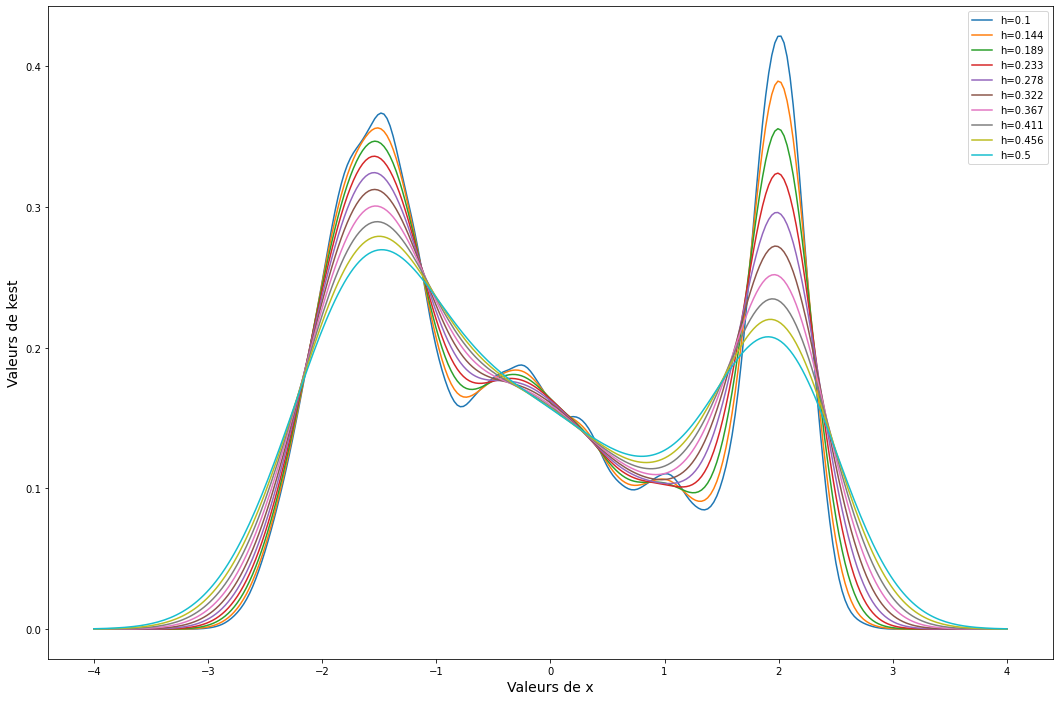

In [13]:
# On affiche les courbes de kest en fonction de h

fig, ax = plt.subplots(figsize=(18, 12))

for h in H:
    kest = kernel_estimate(data, h, K)
    res = [kest(x) for x in X] # kest(X) ne fonctionne pas, si vous savez quoi modifier pour ça m'intéresse
    ax.plot(X, res, label='h={}'.format(np.round(h, 3)))

ax.set_xlabel('Valeurs de x' , fontsize=14)
ax.set_ylabel('Valeurs de kest' , fontsize=14)
ax.legend()
plt.show()

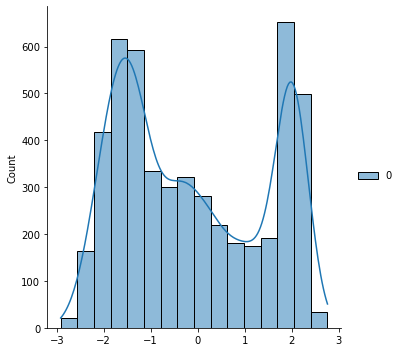

In [14]:
# Résultat en passant par la fonction displot
sns.displot(data, kde = True) 

#### Observations : 
 On remarque que pour h $\approx$ 0.23 le graphe de l'estimateur obtenu est similaire.
Théoriquement la précision de l'estimateur augmente avec h -> 0
Dans notre cas on observe des variations correctes mais d'une amplitude de plus en plus importante.

## Suite  
Considération de l'erreur moyenne quadratique intégrée

On remarque que l'estimateur proposé dépend très fortement du choix de $h_n$ donc la valeur optimale dépend de constates inconnues. Une façon de choisir $h_n$ automatiquement est de minimiser un estimateur de l'erreur quadratique moyenne intégrée. Remarquons que 

$$
\overline{\mathcal{E}} = \mathbb{E}\left[\int_0^1\left(\widehat{p}^h_n(x)-p_{\star}(x)\right)^2 dx\right] = \int_0^1 p^2_{\star}(x)dx + \mathbb{E}\left[\int_0^1 (\widehat{p}^h_n(x))^2dx\right] - 2\int_0^1 p_{\star}(x)\mathbb{E}\left[\widehat{p}^h_n(x)\right]dx\,.
$$

Minimiser $\overline{\mathcal{E}}$ en fonction de $h$ est donc équivalent à minimiser $h \mapsto \mathbb{E}\left[\int_0^1 (\widehat{p}^h_n(x))^2dx\right] - 2\int_0^1 p_{\star}(x)\mathbb{E}\left[\widehat{p}^h_n(x)\right]dx$. Cette quantité étant inconnue, nous proposons de minimiser un estimateur sans biais de cette dernière.

<font color=darkblue> **T4** Montrer que pour tout $h$, un tel estimateur sans biais est donné par :

$$
\int_0^1 (\widehat{p}^h_n(x))^2dx - \frac{2}{n(n-1)h}\sum_{i=1}^n\sum_{j=1, j\neq i }^{n} K\left(\frac{X_i-X_j}{h}\right)\,.
$$
</font>



<font color=darkblue> **S4** Dans le cas où $K: u \mapsto \mathrm{e}^{-u^2/2}$, écrire une fonction retournant l'estimateur de l'erreur précédent.
</font>

In [15]:
from scipy.integrate import quad

In [16]:
def integrated_MSE_estimate(dataset): # Dans l'énoncé il y a h ici avec data. Est-ce normal ?
    """
    Inputs
    ----------
    data: np.array contenant les X_i.
    h: fenêtre de l'estimateur.
    
    Outputs
    -------
    integrated_MSE: estimateur dans biais défini en question Q4.
    """
    
    # On définit les grandeurs utiles :
    n = len(dataset)
    min_, max_ = np.min(dataset), np.max(dataset)
    
    
    # Estimateur de l'erreur quadratique intégrée :
    def integrated_MSE(h):
        kest = kernel_estimate(dataset, h, K)

        integ_ = quad(lambda x: kest(x) * kest(x), min_, max_)[0] # Calcul du terme avec l'intégrale
        
        terms = [np.sum(K((x - dataset) / h)) - 1/(np.sqrt(np.pi*2)) for x in dataset] # On utilise la remarque précédente (pour x != y)
        sums = np.sum(terms)
        
        return integ_ - sums * (2 / (n * (n - 1) * h))
        
    return integrated_MSE


<font color=darkblue> **S5** En fixant une grille de valeurs possibles pour $h_n$, écrire une fonction fournissant le $h_n$ optimal minimisant le critère précédent. Tracer l'estimateur à noyau associé.
</font>

In [17]:
def optimize_bandwith(data,range_h):
    """
    Inputs
    ----------
    data: np.array contenant les X_i.
    range_h: np.array contenant les valeurs possibles pour h
    
    Outputs
    -------
    h_opt: h optimal parmi range_h.
    """
    
    integrated_MSE = integrated_MSE_estimate(data)
    res = [integrated_MSE(h) for h in range_h] # Liste des valeurs de l'EQM intégrée associées à chaque h
    
    h_opt = range_h[np.argmin(res)] # On récupére le h associé à l'erreur minimale
    
    return h_opt

In [18]:
np.random.shuffle(data)
batch_data = data
n = len(batch_data)

range_h = np.linspace(0.01, 5, 20) * n**(-1/5)
print('Valeurs des h {}'.format(range_h))
h_op = optimize_bandwith(batch_data, range_h)


kest_int = kernel_estimate(data, h_op, K)

Valeurs des h [0.00182064 0.04963631 0.09745199 0.14526767 0.19308335 0.24089903
 0.2887147  0.33653038 0.38434606 0.43216174 0.47997742 0.52779309
 0.57560877 0.62342445 0.67124013 0.71905581 0.76687148 0.81468716
 0.86250284 0.91031852]


<ipython-input-16-605bb51088bf>:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integ_ = quad(lambda x: kest(x) * kest(x), min_, max_)[0] # Calcul du terme avec l'intégrale


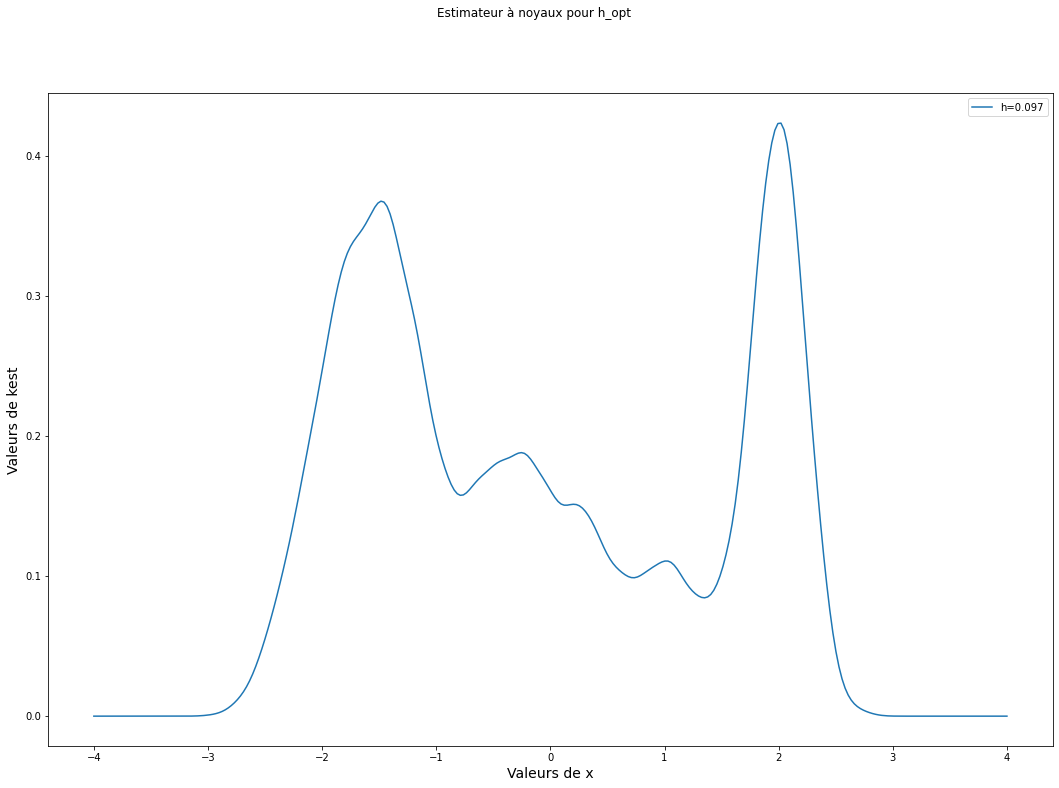

In [19]:
# On affiche les courbes de kest avec h_opt comme paramètre

X = np.linspace(-4, 4, 300) # Valeurs en abscisses
res = [kest_int(x) for x in X] # Valeurs en ordonnées

fig, ax = plt.subplots(figsize=(18, 12))
fig.suptitle("Estimateur à noyaux pour h_opt")

ax.plot(X, res, label='h={}'.format(np.round(h_op, 3)))

ax.set_xlabel('Valeurs de x' , fontsize=14)
ax.set_ylabel('Valeurs de kest' , fontsize=14)

ax.legend()
plt.show()

#### Remarque :
Nous n'obtenons pas vraiment la même courbe - notamment pour les hauteurs des pics - que l'estimateur via snd. 

Peut-être ont-ils considéré une métrique différente / ajouté une condition sur la "stabilité" de la fonction ?